In [2]:
#IMPORT REQUIRED PACKAGE
import pandas as pd
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions

In [3]:
#READ DATA
column_names = ['status', 'id', 'date', 'query', 'name', 'tweet']
data = pd.read_csv(r"twitter.csv", names = column_names, encoding='latin1')

#CONVERT TO DATAFRAME
df = pd.DataFrame(data)
df

,status,id,date,query,name,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
#TAKE SAMPLE DATA FROM ENTIRE DATA FRAME
sampled_df = df.sample(n=10000, random_state=42)

In [5]:
sampled_df['status'].value_counts()

status
0    5004
4    4996
Name: count, dtype: int64

In [6]:
#REPLACE 4 BY 1. 1-->POSITIVE TWEET, 0-->NEGATIVE TWEET
sampled_df['status'] = sampled_df['status'].replace(4, 1)


In [7]:
df1 = sampled_df[['status', 'tweet']]
df1

,status,tweet
541200,0,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,@TiannaChaos i know just family drama. its la...
285055,0,School email won't open and I have geography ...
705995,0,upper airways problem
...,...,...
965972,1,"My sister, Cheyenne's birthday party is today!..."
1193436,1,@addieking you are SO welcome
896390,1,@RebekahMaylene seriously!! Those gals were ma...
544127,0,@SarahMascara thanks now i want chicken and ch...


In [8]:
def clean_text(text):
    text=text.lower()
    
    # Remove URLs and emails
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove punctuation, numbers, and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize (or Stem)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [9]:
sampled_df['cleaned_tweet'] = sampled_df['tweet'].apply(clean_text)

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
text = ' '.join(sampled_df['cleaned_tweet'])

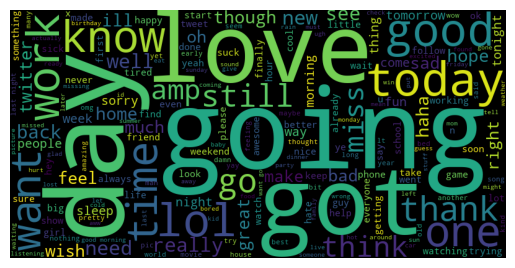

In [12]:
wc = WordCloud(width = 800,height = 400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
X = sampled_df['cleaned_tweet']
y = sampled_df['status']
    
# Convert the text data into TF-IDF features
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

<10000x17813 sparse matrix of type '<class 'numpy.float64'>'
	with 70847 stored elements in Compressed Sparse Row format>

In [40]:
x=X_test[0]

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


lr= LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Print the accuracy score and classification report
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))



Accuracy Score: 0.716
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71      1001
           1       0.70      0.74      0.72       999

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



In [26]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

# Print the accuracy score and classification report
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.654
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.63      0.65      1001
           1       0.65      0.68      0.66       999

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000



In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Print the accuracy score and classification report
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.6925
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.60      0.66      1001
           1       0.66      0.79      0.72       999

    accuracy                           0.69      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.70      0.69      0.69      2000



In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Print the accuracy score and classification report
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.665
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.51      0.60      1001
           1       0.63      0.82      0.71       999

    accuracy                           0.67      2000
   macro avg       0.68      0.67      0.66      2000
weighted avg       0.68      0.67      0.66      2000



In [42]:
a=X_test[0]

In [43]:
lr.predict(a)

array([0], dtype=int64)

In [44]:
b=X_test[99]

In [45]:
lr.predict(b)

array([1], dtype=int64)

In [50]:
x = ['after long days i went to meet my friend and had a good time']
x = tfidf.transform(x)

In [51]:
lr.predict(x)

array([1], dtype=int64)

In [56]:
c=['i am not feeling well went to hospital yesterday']
c = tfidf.transform(c)

In [57]:
lr.predict(c)

array([0], dtype=int64)